![logo](./img/TheBridge_RL.png)

# Introducción a los entornos de prueba de aprendizaje por refuerzo (el Gym) (II)

## Contenidos

* [Antes de empezar: Animaciones con Matplotlib](#Antes-de-empezar:-Animaciones-con-Matplotlib)  
* [Ciclo 'ejemplo' de Aprendizaje por Refuerzo](#Ciclo-'ejemplo'-de-Aprendizaje-por-Refuerzo)  


### Antes de empezar: Animaciones con Matplotlib  
[al indice](#Contenidos)  


En la sesión anterior vimos como mostrar un estado de un entorno del Gym de OpenAI, pero lo que realmente nos interesa es ver la animación completa de una serie de pasos o acciones (un step)

Para ello vamos a emplear las animaciones de la librería matplotlib

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('animation', html='jshtml')

Primero importamos los módulos de la librería que nos interesan (animation y pyplot) y después ajustamos algunos parámetros de configuración. El importante es el úlitmo en el que le indicamos a pyplot que utilizaremos animaciones sobre un componente interno javascript.

Ahora preparamos algunas funciones para que construyan la animacion dada una coleción de "pantallazos" (frames) proporcionados por el entorno de gym al invocar el método render (env.render())

In [ ]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

Para ver cómo funciona, la aplicamos al último ejemplo de la sesión anterior

In [ ]:
import gym


In [ ]:
env = gym.make("MountainCar-v0", render_mode = "rgb_array")
env.reset()
frames = []
for i in range (100):
    obs,reward,done, truncated,info = env.step(0)
    frames.append(env.render())

plot_animation(frames)

### Ciclo 'ejemplo' de Aprendizaje por Refuerzo  
[al indice](#Contenidos)  


Recordamos como era un ciclo o proceso de Aprendizaje por refuerzo:

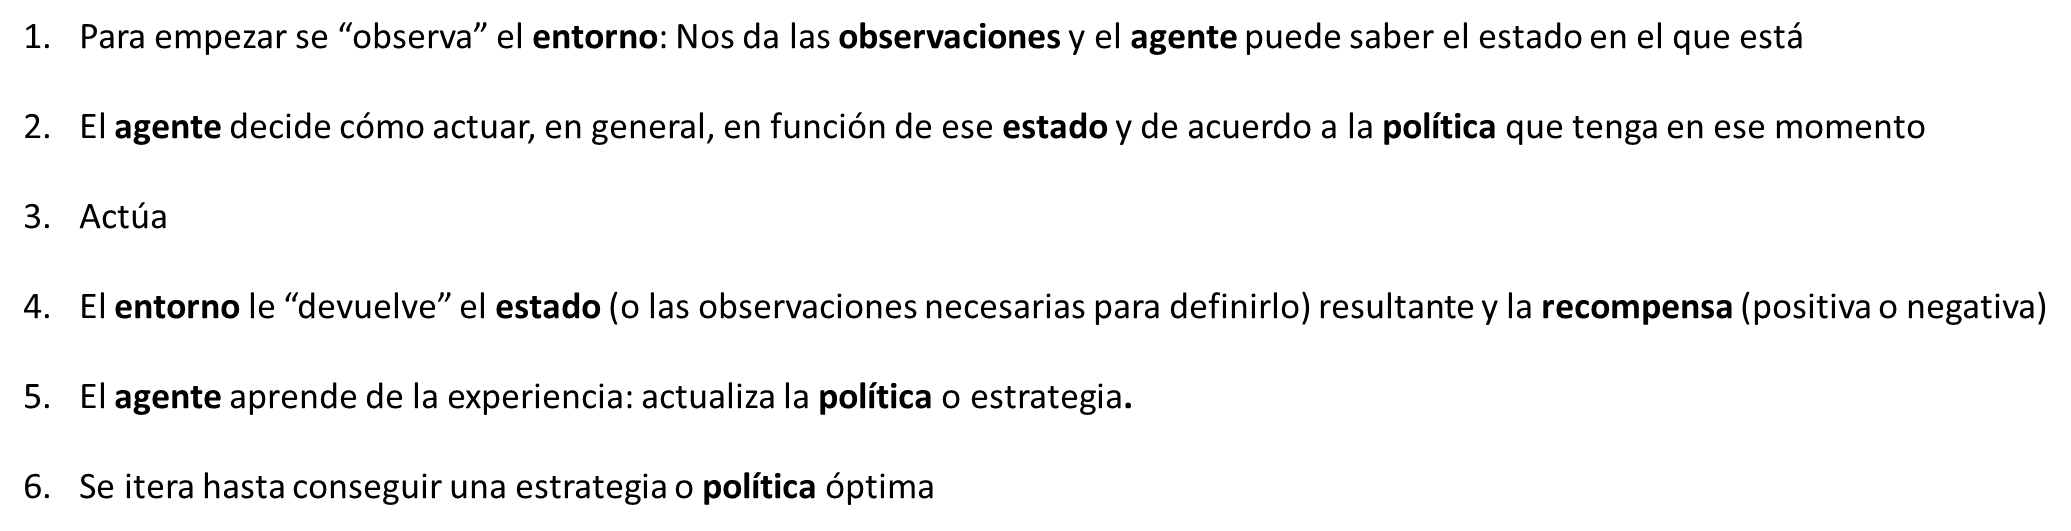

Antes de empezar necesitaremos una política/policy que nos diga que acción tomar en cada momento y una función fictica que actualice (que aprenda) esa política/policy en función de las recompensas. Lo demás lo podemos implementar usando las funciones y métodos del entorno

In [ ]:
# La acción a escoger es acelerar a la izquierda (0) hasta llegar al límite 
#izquierdo y entonces siempre acelerar a la derecha (2)

limite_izquierdo = env.observation_space.low[0]

In [ ]:
def policy(observations):
    eje_x=observations[0]
    velocidad = observations[1]
    
    if eje_x>limite_izquierdo and velocidad<=0:
        return 0
    else:
        return 2
    
def update_policy(reward):
    #Aquí vendría la lógica o modelos de aprendizaje, Q-learning
    return 1

Ahora, ya podemos crear el ciclo

In [ ]:
obs,info = env.reset() #observamos el estado inicial
num_steps = 1000 #límite número de acciones
frames = []
total_reward = 0

for i in range (num_steps):
    selected_action = policy(obs)
    obs,reward,done,truncated,info = env.step(selected_action)
    total_reward += reward
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        break
    update_policy(reward)

print("Total recompensa:", total_reward)
print ("Num steps ejecutados:", i)
plot_animation(frames)
    

Genial, no hemos necesitado siquiera que aprendiese, con la política inicial ha sido suficiente para conseguir el objetivo, pero eso no quiere decir que no haya una política mejor (es decir que obtenga un castigo menor). Si hubieramos implementado update_policy es posible que hubieramos encontrado una mejor

En las siguientes sesiones vamos a ayudar a aprender a un coche a conducir por sí solo y recoger pasajeros, pero esta vez aprendiendo la política o estrategia de acción.